In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
import confusion_matrix_pretty_print as cmpp

In [4]:
X_train = pd.read_csv('../subset/X_winetrain.csv', index_col=0)
X_test = pd.read_csv('../subset/X_winetest.csv', index_col=0)
y_train = pd.read_csv('../subset/y_winetrain.csv', header=None, index_col=0, squeeze=True)
y_test = pd.read_csv('../subset/y_winetest.csv', header=None, index_col=0, squeeze=True)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 11)
(5197,)
(1300, 11)
(1300,)


In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
clf = SVC(kernel='sigmoid')

In [10]:
%time clf.fit(X_train,y_train)

CPU times: user 1.38 s, sys: 36.2 ms, total: 1.42 s
Wall time: 1.05 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
metrics.accuracy_score(y_test, y_pred)

0.42615384615384616

In [13]:
y_test.value_counts()

1    654
0    399
2    247
Name: 1, dtype: int64

# Null Accuracy

In [14]:
y_test.value_counts().head(1) / y_test.count()

1    0.503077
Name: 1, dtype: float64

# Confusion Matrix

In [15]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[207 164  28]
 [222 261 171]
 [111  50  86]]


In [16]:
labels = ['Ok','Good','Great']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

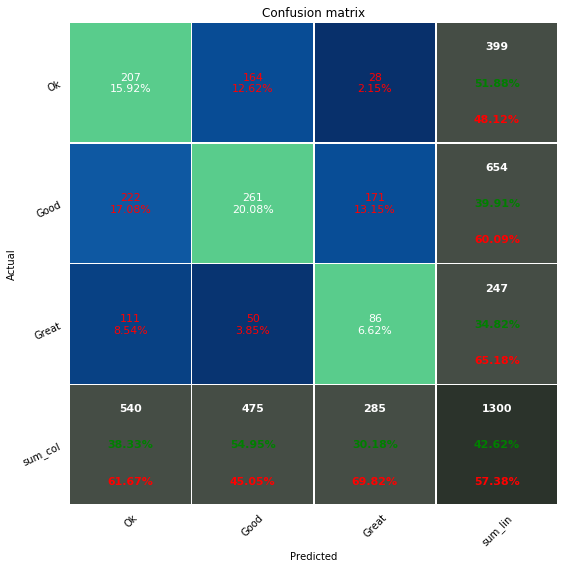

In [17]:
cmpp.pretty_plot_confusion_matrix(df_cm, cmap="Blues_r", show_null_values=1, pred_val_axis='x')

In [18]:
cm.sum(axis=1)

array([399, 654, 247])

In [19]:
np.diag(cm)

array([207, 261,  86])

In [20]:
cm.sum(axis=1) - np.diag(cm)

array([192, 393, 161])

## When Actual = Rows and Predicted = Columns
## TP: Diagonal top left to bottom right
## TN: Values in all columns and rows excluding given Class column and row
## FP: Values in column excluding TP
## FN: Values in row excluding TP

In [21]:
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (TP + FP + FN)

print(TP)
print(FP)
print(FN)
print(TN)

[207 261  86]
[333 214 199]
[192 393 161]
[568 432 854]


## Accuracy: How often correct?  _Diagonal / Total_

In [22]:
print(metrics.accuracy_score(y_test,y_pred))
print(TP.sum() / cm.sum())

0.42615384615384616
0.42615384615384616


## Classification Error: How often incorrect? _Non-Diagonal / Total_

In [23]:
print(1 - metrics.accuracy_score(y_test,y_pred))
print((cm.sum() - np.diag(cm).sum()) / cm.sum())

0.5738461538461539
0.5738461538461539


## Precision: When a positive value is predicted, how often is it correct? _TP / Column Total_

In [24]:
print(metrics.precision_score(y_test,y_pred, average=None))
print(TP / (TP + FP))

[0.38333333 0.54947368 0.30175439]
[0.38333333 0.54947368 0.30175439]


## Sensitivity (Recall or TPR): When actual value is positive, how often is prediction correct? _TP / Row Total_

In [25]:
print(metrics.recall_score(y_test,y_pred, average=None))
print(TP/(TP+FN))

[0.51879699 0.39908257 0.34817814]
[0.51879699 0.39908257 0.34817814]


## False Positive Rate FP / float(TN + FP)
=1 - Specificty

In [26]:
print(FP / (TN + FP))

[0.36958935 0.33126935 0.18898386]


## Specifity TN / float(TN + FP)
When the actual value is negative, how often is the prediction correct?

In [27]:
print(TN / (TN + FP))
print([1,1,1] - (FP / (TN + FP)))

[0.63041065 0.66873065 0.81101614]
[0.63041065 0.66873065 0.81101614]


In [28]:
metrics.matthews_corrcoef(y_test,y_pred)

0.11597945077566774

#### https://www.researchgate.net/post/Multiclass_Confusion_Matrix_Explanation

In [29]:
X_train.shape

(5197, 11)

In [30]:
X = pd.read_csv('../subset/X_wine.csv', index_col=0)
y = pd.read_csv('../subset/y_wine.csv', header=None, index_col=0, squeeze=True)

In [31]:
y.value_counts()

1    2836
0    2384
2    1277
Name: 1, dtype: int64

In [32]:
print(X.shape)
print(y.shape)

(6497, 11)
(6497,)


In [33]:
print(clf)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [34]:
labels = np.unique(y)
print(labels)

[0 1 2]


In [35]:
train_sizes = [50,520,1300,2600,3900,5196]
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, shuffle=True, random_state=0, scoring='accuracy')

In [36]:
print(train_scores)
print(validation_scores)

[[0.46       0.48       0.54       0.44       0.44      ]
 [0.41153846 0.475      0.47307692 0.41346154 0.44038462]
 [0.43615385 0.43384615 0.45538462 0.43153846 0.43076923]
 [0.43769231 0.44       0.43923077 0.425      0.43269231]
 [0.43589744 0.44076923 0.43333333 0.42769231 0.43487179]
 [0.43648961 0.43648961 0.43648961 0.43629715 0.43648961]]
[[0.36664105 0.43615385 0.43648961 0.36720554 0.36671803]
 [0.43658724 0.43615385 0.43648961 0.43648961 0.43682589]
 [0.43658724 0.43615385 0.43648961 0.43648961 0.43682589]
 [0.43658724 0.43615385 0.43648961 0.43648961 0.43682589]
 [0.43658724 0.43615385 0.43648961 0.43648961 0.43682589]
 [0.43658724 0.43615385 0.43648961 0.43648961 0.43682589]]


In [37]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

In [38]:
print(pd.Series(train_scores_mean, index=train_sizes))
print()
print(pd.Series(validation_scores_mean, index=train_sizes))

50      0.472000
520     0.442692
1300    0.437538
2600    0.434923
3900    0.434513
5196    0.436451
dtype: float64

50      0.394642
520     0.436509
1300    0.436509
2600    0.436509
3900    0.436509
5196    0.436509
dtype: float64


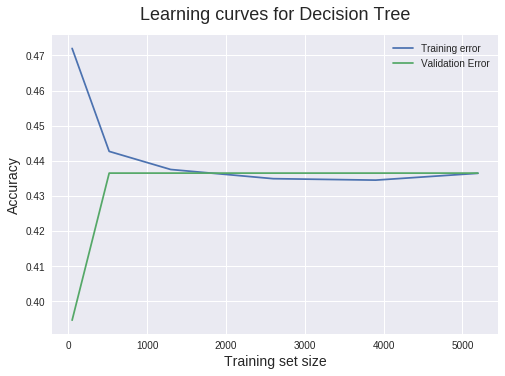

In [39]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [40]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, shuffle=True, random_state=0,scoring='accuracy')

In [41]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

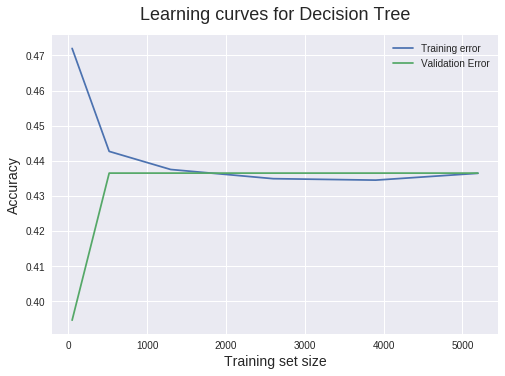

In [42]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [43]:
#kern = ['linear', 'poly']

#param_grid = dict(kernel=kern)

In [44]:
#grid = GridSearchCV(clf, param_grid, scoring='accuracy')

In [45]:
#grid.fit(X,y)

In [46]:
#pd.DataFrame(grid.cv_results_)

In [47]:
#grid.best_score_

In [48]:
#grid.best_params_